In [3]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from torch.profiler import profile, record_function, ProfilerActivity
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import torch

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

class CustomDataLoader:
    def __init__(self, features, labels, batch_size=1, validation_size=0.0, shuffle=False):
        if validation_size > 0:
            train_data, val_data, train_labels, val_labels = train_test_split(
                features, labels, test_size=validation_size, random_state=42
            )
            self.train_loader = DataLoader(
                TensorDataset(torch.tensor(train_data).float(), torch.tensor(train_labels).float()),
                batch_size=batch_size,
                shuffle=shuffle,
            )
            self.val_loader = DataLoader(
                TensorDataset(torch.tensor(val_data).float(), torch.tensor(val_labels).float()), batch_size=batch_size, shuffle=shuffle
            )
        else:
            self.train_loader = DataLoader(
                TensorDataset(torch.tensor(features).float(), torch.tensor(labels).float()), batch_size=batch_size, shuffle=shuffle
            )
            self.val_loader = None

    def get_train_loader(self):
        return self.train_loader

    def get_val_loader(self):
        return self.val_loader

def evaluate_model(model, custom_train_loader, criterion, optimizer):
    num_epochs = 1200
    parameters = []
    image_folder = 'training_images'
    os.makedirs(image_folder, exist_ok=True)
    
#     num = 10000
#     x = np.linspace(-6, 6, num)
#     y = np.linspace(-0, 0, num)
#     random_feature1 = np.linspace(-0, 0, num)
#     random_feature2 = np.linspace(-0, 0, num)

#     inputs = np.stack([x], axis=1)
#     inputs_tensor = torch.from_numpy(inputs).float().to(device)

#     model.eval()
#     with torch.no_grad():
#         y_pred_model = model(inputs_tensor).cpu().numpy()

#     a = x
#     y_pred_manual = np.sin(a) + 2 * np.cos(a + 3 * np.sin(a)) + 3 * np.cos(a) ** 2 * np.sin(a) ** 2 + 0.5 * np.cos(a)

#     plt.figure(figsize=(10, 5))
#     plt.scatter(x, y_pred_model.flatten(), label='Model Output', s=1, alpha=0.1)
#     plt.scatter(x, y_pred_manual, label='Manual Calculation', s=1, alpha=0.1)
#     plt.xlabel('Input Feature 1')
#     plt.ylabel('Output')
#     plt.legend()
#     plt.grid(True)
#     plt.savefig(f"{image_folder}/epoch_0000.png")
#     plt.close()

    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in custom_train_loader.get_train_loader():
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs.view(-1, 2))
            loss = criterion(outputs, labels.view(-1, 1))

            if torch.isnan(loss):
                print("Loss is NaN or Inf")
                print(parameters)

                for name, param in model.named_parameters():
                    print(f"{name}: {param}")
                break

            parameters = []
            for name, param in model.named_parameters():
                parameters.append(f"{name}: {param}")

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        avg_train_loss = running_loss / len(custom_train_loader.get_train_loader())
            
        model.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in custom_train_loader.get_val_loader():
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs.view(-1, 2))
                val_loss = criterion(outputs, labels.view(-1, 1))
                running_val_loss += val_loss.item()

        avg_val_loss = running_val_loss / len(custom_train_loader.get_val_loader())
        print(f"Epoch {epoch+1:4d} | Train Loss: {avg_train_loss:10.4f} | Validation Loss: {avg_val_loss:10.4f}")

        num = 10000
        
        columns = []
        
        x = np.linspace(-6, 6, num).reshape(-1, 1)
        y = np.linspace(-0, 0, num)
        random_feature1 = np.linspace(-0, 0, num)
        random_feature2 = np.linspace(-0, 0, num)

        const_array = np.full((num, 1), const)

#         inputs = np.hstack([x, const_array])
#         inputs_tensor = torch.from_numpy(inputs).float().to(device)

        for bias in biases:
            column = x + bias
            columns.append(column)
        columns.append(const_array)
        
        inputs = np.column_stack(columns)
        inputs_tensor = torch.from_numpy(inputs).float().to(device)

        model.eval()
        with torch.no_grad():
            y_pred_model = model(inputs_tensor).cpu().numpy()

        a = x
        y_pred_manual = np.sin(a) + 2 * np.cos(a + 3 * np.sin(a)) + 3 * np.cos(a) ** 2 * np.sin(a) ** 2 + 0.5 * np.cos(a)
        
        plt.figure(figsize=(10, 5))
        plt.scatter(x, y_pred_model.flatten(), label='Model Output', s=1, alpha=0.1)
        plt.scatter(x, y_pred_manual, label='Manual Calculation', s=1, alpha=0.1)
        plt.xlabel('Input Feature 1')
        plt.ylabel('Output')
        plt.legend()
        plt.grid(True)
        plt.savefig(f"{image_folder}/epoch_{epoch+1:04d}.png")
        plt.close()

    # Create a GIF from the saved images
    images = []
    for epoch in range(num_epochs):
        filename = f"{image_folder}/epoch_{epoch+1:04d}.png"
        images.append(imageio.imread(filename))
    imageio.mimsave('training_progress.gif', images, duration=0.2)

In [5]:
import numpy as np
num_samples = 128 * 100
import math

a = (np.random.rand(num_samples, 1) - 0.5) * 12
b = (np.random.rand(num_samples, 1) - 0.5) * 8
c = (np.random.rand(num_samples, 1) - 0.5) * 4
d = (np.random.rand(num_samples, 1) - 0.5) * 4
e = (np.random.rand(num_samples, 1) - 0.5) * 4

const = 1
const_array = np.full((num_samples, 1), const)

# x_train = np.hstack([a, const_array])
columns = []
biases = []

for _ in range(1):
    bias = np.random.uniform(-1, 1) 
    biases.append(bias)
    column = a + 0
    columns.append(column)

columns.append(const_array)
biases = np.array(biases)

x_train = np.column_stack(columns)
y_train = np.abs(a)
y_train = np.sin(a) + 2 * np.cos(a + 3 * np.sin(a)) + 3 * np.cos(a) ** 2 * np.sin(a) ** 2 + 0.5 * np.cos(a)

custom_train_loader = CustomDataLoader(x_train, y_train, batch_size=128, validation_size=0.2, shuffle=True)

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
import torch
import torch.nn as nn
from numpy import pi

class CustomLayer1(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(CustomLayer1, self).__init__()
        self.sigmoid = nn.Sigmoid()
        self.hard_sigmoid = nn.Hardsigmoid()
        self.linear_sigmoid = nn.Linear(input_dim, output_dim, bias=False)
        self.relu = nn.ReLU()
        self.softplus = nn.Softplus()
        self.tanh = nn.Tanh()

        nn.init.zeros_(self.linear_sigmoid.weight)
#         nn.init.zeros_(self.linear_sigmoid.bias)

    def forward(self, x, prev_x):
        sigmoid_gate = self.sigmoid(2 * self.linear_sigmoid(prev_x))
        return x * sigmoid_gate * 2

In [8]:
class CustomActivationLayerTwo(nn.Module):
    def __init__(self, num_features):
        super(CustomActivationLayerTwo, self).__init__()
        self.beta = nn.Parameter(torch.zeros(num_features))

    def forward(self, inputs):
        return torch.where(inputs < 0, inputs * self.beta, inputs)

In [35]:
class PairwiseCustomActivationNetwork(nn.Module):
    def __init__(self, input_size, num_layers, output_size):
        super(PairwiseCustomActivationNetwork, self).__init__()

        self.num_layers = num_layers
        self.layers = nn.ModuleList()
        self.custom_layers = nn.ModuleList()
        self.softplus = nn.Softplus()
        self.relu = nn.ReLU()
   
        layer_size = input_size
        for i in range(1, num_layers):
            self.layers.append(nn.Linear(layer_size, layer_size, bias=True))
#             self.custom_layers.append(CustomActivationLayerTwo(layer_size))
            self.custom_layers.append(CustomLayer1(layer_size, layer_size))
            layer_size *= 2
    
        self.layers.append(nn.Linear(layer_size, output_size))
#         self.custom_layers.append(CustomActivationLayerTwo(output_size))
        self.custom_layers.append(CustomLayer1(layer_size, output_size))
        self._initialize_weights()

    def forward(self, x):
        outputs = [x]
        
        for layer, custom_layer in zip(self.layers, self.custom_layers):
            concatenated_outputs = torch.cat(outputs, dim=1)
            out = (layer(concatenated_outputs))
            out = custom_layer(out, concatenated_outputs)
            outputs.append(out)

        return outputs[-1]
    
    def _initialize_weights(self):
        for i, layer in enumerate(self.layers):
            if isinstance(layer, nn.Linear):
                if i == len(self.layers) - 1:
                    layer.weight.data.fill_(0)
                else:
                    in_features = layer.weight.size(1)
                    eye_matrix = torch.eye(in_features)
                    layer.weight.data = eye_matrix
                if layer.bias is not None:
                    nn.init.normal_(layer.bias, mean=0.0, std=0.1)
                    layer.bias.data.zero_()

model_prepu = PairwiseCustomActivationNetwork(2, 12, 1).to(device)
print(summary(model_prepu, input_size=(1, 2)))
criterion = nn.MSELoss()
optimizer = optim.SGD(model_prepu.parameters(), lr=0.0000001)
optimizer = optim.Adam(model_prepu.parameters(), lr=0.000001)

Layer (type:depth-idx)                   Output Shape              Param #
PairwiseCustomActivationNetwork          [1, 1]                    --
├─ModuleList: 1-23                       --                        (recursive)
│    └─Linear: 2-1                       [1, 2]                    6
├─ModuleList: 1-24                       --                        (recursive)
│    └─CustomLayer1: 2-2                 [1, 2]                    --
│    │    └─Linear: 3-1                  [1, 2]                    4
│    │    └─Sigmoid: 3-2                 [1, 2]                    --
├─ModuleList: 1-23                       --                        (recursive)
│    └─Linear: 2-3                       [1, 4]                    20
├─ModuleList: 1-24                       --                        (recursive)
│    └─CustomLayer1: 2-4                 [1, 4]                    --
│    │    └─Linear: 3-3                  [1, 4]                    16
│    │    └─Sigmoid: 3-4                 [1, 4]    

In [ ]:
optimizer = optim.SGD(model_prepu.parameters(), lr=0.000001 * 10)
optimizer = optim.Adam(model_prepu.parameters(), lr=0.000001)
evaluate_model(model_prepu, custom_train_loader, criterion, optimizer)

Epoch    1 | Train Loss:     1.5332 | Validation Loss:     1.4640
Epoch    2 | Train Loss:     1.4550 | Validation Loss:     1.4441
Epoch    3 | Train Loss:     1.4422 | Validation Loss:     1.4411
Epoch    4 | Train Loss:     1.4317 | Validation Loss:     1.4255
Epoch    5 | Train Loss:     1.4221 | Validation Loss:     1.4141
Epoch    6 | Train Loss:     1.4106 | Validation Loss:     1.4045
Epoch    7 | Train Loss:     1.4010 | Validation Loss:     1.3888
Epoch    8 | Train Loss:     1.3868 | Validation Loss:     1.3796
Epoch    9 | Train Loss:     1.3665 | Validation Loss:     1.3470
Epoch   10 | Train Loss:     1.3333 | Validation Loss:     1.2943
Epoch   11 | Train Loss:     1.2638 | Validation Loss:     1.2111
Epoch   12 | Train Loss:     1.1964 | Validation Loss:     1.1562
Epoch   13 | Train Loss:     1.1539 | Validation Loss:     1.1047
Epoch   14 | Train Loss:     1.1022 | Validation Loss:     1.0414
Epoch   15 | Train Loss:     1.0290 | Validation Loss:     0.9500
Epoch   16

In [ ]:
optimizer = optim.Adam(model_prepu.parameters(), lr=0.000001)
evaluate_model(model_prepu, custom_train_loader, criterion, optimizer)

Epoch    1 | Train Loss:     0.0726 | Validation Loss:     0.0602
Epoch    2 | Train Loss:     0.0510 | Validation Loss:     0.0396
Epoch    3 | Train Loss:     0.0327 | Validation Loss:     0.0254
Epoch    4 | Train Loss:     0.0228 | Validation Loss:     0.0203
Epoch    5 | Train Loss:     0.0201 | Validation Loss:     0.0194
Epoch    6 | Train Loss:     0.0195 | Validation Loss:     0.0190
Epoch    7 | Train Loss:     0.0191 | Validation Loss:     0.0186
Epoch    8 | Train Loss:     0.0186 | Validation Loss:     0.0181
Epoch    9 | Train Loss:     0.0181 | Validation Loss:     0.0176
Epoch   10 | Train Loss:     0.0175 | Validation Loss:     0.0169
Epoch   11 | Train Loss:     0.0168 | Validation Loss:     0.0162
Epoch   12 | Train Loss:     0.0160 | Validation Loss:     0.0154
Epoch   13 | Train Loss:     0.0151 | Validation Loss:     0.0144
Epoch   14 | Train Loss:     0.0141 | Validation Loss:     0.0133
Epoch   15 | Train Loss:     0.0129 | Validation Loss:     0.0121
Epoch   16

Epoch    1 | Train Loss:     0.1256 | Validation Loss:     0.1085
Epoch    2 | Train Loss:     0.0968 | Validation Loss:     0.0819
Epoch    3 | Train Loss:     0.0715 | Validation Loss:     0.0583
Epoch    4 | Train Loss:     0.0488 | Validation Loss:     0.0374
Epoch    5 | Train Loss:     0.0307 | Validation Loss:     0.0239
Epoch    6 | Train Loss:     0.0218 | Validation Loss:     0.0196
Epoch    7 | Train Loss:     0.0196 | Validation Loss:     0.0189
Epoch    8 | Train Loss:     0.0190 | Validation Loss:     0.0185
Epoch    9 | Train Loss:     0.0185 | Validation Loss:     0.0180
Epoch   10 | Train Loss:     0.0181 | Validation Loss:     0.0176
Epoch   11 | Train Loss:     0.0176 | Validation Loss:     0.0170
Epoch   12 | Train Loss:     0.0170 | Validation Loss:     0.0165
Epoch   13 | Train Loss:     0.0164 | Validation Loss:     0.0159
Epoch   14 | Train Loss:     0.0157 | Validation Loss:     0.0152
Epoch   15 | Train Loss:     0.0150 | Validation Loss:     0.0144
Epoch   16

KeyboardInterrupt: 

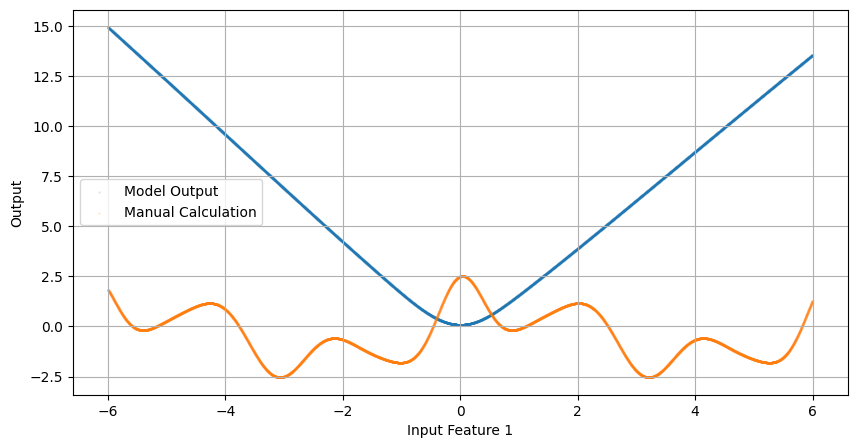

In [46]:
optimizer = optim.Adam(model_prepu.parameters(), lr=0.000001)
evaluate_model(model_prepu, custom_train_loader, criterion, optimizer)

In [41]:
optimizer = optim.Adam(model_prepu.parameters(), lr=0.000001)
evaluate_model(model_prepu, custom_train_loader, criterion, optimizer)

Epoch    1 | Train Loss:     0.2435 | Validation Loss:     0.2315
Epoch    2 | Train Loss:     0.2169 | Validation Loss:     0.2060
Epoch    3 | Train Loss:     0.1925 | Validation Loss:     0.1826
Epoch    4 | Train Loss:     0.1704 | Validation Loss:     0.1614
Epoch    5 | Train Loss:     0.1503 | Validation Loss:     0.1423
Epoch    6 | Train Loss:     0.1324 | Validation Loss:     0.1252
Epoch    7 | Train Loss:     0.1164 | Validation Loss:     0.1100
Epoch    8 | Train Loss:     0.1022 | Validation Loss:     0.0966
Epoch    9 | Train Loss:     0.0898 | Validation Loss:     0.0849
Epoch   10 | Train Loss:     0.0789 | Validation Loss:     0.0747
Epoch   11 | Train Loss:     0.0695 | Validation Loss:     0.0659
Epoch   12 | Train Loss:     0.0614 | Validation Loss:     0.0583
Epoch   13 | Train Loss:     0.0545 | Validation Loss:     0.0519
Epoch   14 | Train Loss:     0.0486 | Validation Loss:     0.0464
Epoch   15 | Train Loss:     0.0437 | Validation Loss:     0.0418
Epoch   16

KeyboardInterrupt: 

In [15]:
optimizer = optim.Adam(model_prepu.parameters(), lr=0.000001)
evaluate_model(model_prepu, custom_train_loader, criterion, optimizer)

Epoch    1 | Train Loss:    10.4650 | Validation Loss:     8.3437
Epoch    2 | Train Loss:     5.8716 | Validation Loss:     2.9814
Epoch    3 | Train Loss:     1.7122 | Validation Loss:     0.8699
Epoch    4 | Train Loss:     0.6292 | Validation Loss:     0.4801
Epoch    5 | Train Loss:     0.3817 | Validation Loss:     0.3244
Epoch    6 | Train Loss:     0.2651 | Validation Loss:     0.2360
Epoch    7 | Train Loss:     0.1987 | Validation Loss:     0.1839
Epoch    8 | Train Loss:     0.1599 | Validation Loss:     0.1529
Epoch    9 | Train Loss:     0.1364 | Validation Loss:     0.1337
Epoch   10 | Train Loss:     0.1214 | Validation Loss:     0.1207
Epoch   11 | Train Loss:     0.1110 | Validation Loss:     0.1111
Epoch   12 | Train Loss:     0.1029 | Validation Loss:     0.1035
Epoch   13 | Train Loss:     0.0960 | Validation Loss:     0.0967
Epoch   14 | Train Loss:     0.0899 | Validation Loss:     0.0904
Epoch   15 | Train Loss:     0.0840 | Validation Loss:     0.0846
Epoch   16

KeyboardInterrupt: 

In [12]:
optimizer = optim.Adam(model_prepu.parameters(), lr=0.00001)
evaluate_model(model_prepu, custom_train_loader, criterion, optimizer)

Epoch    1 | Train Loss:     1.8894 | Validation Loss:     1.6232
Epoch    2 | Train Loss:     1.6350 | Validation Loss:     1.5837
Epoch    3 | Train Loss:     1.6092 | Validation Loss:     1.5665
Epoch    4 | Train Loss:     1.5960 | Validation Loss:     1.5550
Epoch    5 | Train Loss:     1.5856 | Validation Loss:     1.5445
Epoch    6 | Train Loss:     1.5763 | Validation Loss:     1.5347
Epoch    7 | Train Loss:     1.5674 | Validation Loss:     1.5278
Epoch    8 | Train Loss:     1.5589 | Validation Loss:     1.5192
Epoch    9 | Train Loss:     1.5511 | Validation Loss:     1.5093
Epoch   10 | Train Loss:     1.5421 | Validation Loss:     1.5011
Epoch   11 | Train Loss:     1.5331 | Validation Loss:     1.4929
Epoch   12 | Train Loss:     1.5237 | Validation Loss:     1.4834
Epoch   13 | Train Loss:     1.5140 | Validation Loss:     1.4742
Epoch   14 | Train Loss:     1.5032 | Validation Loss:     1.4622
Epoch   15 | Train Loss:     1.4901 | Validation Loss:     1.4507
Epoch   16

KeyboardInterrupt: 

In [22]:
optimizer = optim.Adam(model_prepu.parameters(), lr=0.000001)
evaluate_model(model_prepu, custom_train_loader, criterion, optimizer)

Epoch    1 | Train Loss:     1.6478 | Validation Loss:     1.6153
Epoch    2 | Train Loss:     1.5846 | Validation Loss:     1.5767
Epoch    3 | Train Loss:     1.5490 | Validation Loss:     1.5534
Epoch    4 | Train Loss:     1.5245 | Validation Loss:     1.5353
Epoch    5 | Train Loss:     1.5053 | Validation Loss:     1.5214
Epoch    6 | Train Loss:     1.4903 | Validation Loss:     1.5103
Epoch    7 | Train Loss:     1.4789 | Validation Loss:     1.5026
Epoch    8 | Train Loss:     1.4708 | Validation Loss:     1.4978
Epoch    9 | Train Loss:     1.4653 | Validation Loss:     1.4952
Epoch   10 | Train Loss:     1.4618 | Validation Loss:     1.4936
Epoch   11 | Train Loss:     1.4598 | Validation Loss:     1.4932
Epoch   12 | Train Loss:     1.4586 | Validation Loss:     1.4933
Epoch   13 | Train Loss:     1.4580 | Validation Loss:     1.4933
Epoch   14 | Train Loss:     1.4577 | Validation Loss:     1.4932
Epoch   15 | Train Loss:     1.4576 | Validation Loss:     1.4940
Epoch   16

KeyboardInterrupt: 

In [ ]:
optimizer = optim.Adam(model_prepu.parameters(), lr=0.000001)
evaluate_model(model_prepu, custom_train_loader, criterion, optimizer)

Epoch    1 | Train Loss:     1.0042 | Validation Loss:     1.0352
Epoch    2 | Train Loss:     1.0042 | Validation Loss:     1.0352
Epoch    3 | Train Loss:     1.0042 | Validation Loss:     1.0352
Epoch    4 | Train Loss:     1.0042 | Validation Loss:     1.0352
Epoch    5 | Train Loss:     1.0042 | Validation Loss:     1.0352
Epoch    6 | Train Loss:     1.0042 | Validation Loss:     1.0352
Epoch    7 | Train Loss:     1.0042 | Validation Loss:     1.0352
Epoch    8 | Train Loss:     1.0042 | Validation Loss:     1.0352
Epoch    9 | Train Loss:     1.0042 | Validation Loss:     1.0352
Epoch   10 | Train Loss:     1.0042 | Validation Loss:     1.0352
Epoch   11 | Train Loss:     1.0042 | Validation Loss:     1.0352
Epoch   12 | Train Loss:     1.0042 | Validation Loss:     1.0352
Epoch   13 | Train Loss:     1.0042 | Validation Loss:     1.0352
Epoch   14 | Train Loss:     1.0042 | Validation Loss:     1.0352
Epoch   15 | Train Loss:     1.0042 | Validation Loss:     1.0352
Epoch   16

In [124]:
evaluate_model(model_prepu, custom_train_loader, criterion, optimizer)

Epoch    1 | Train Loss:     1.6789 | Validation Loss:     1.5830
Epoch    2 | Train Loss:     1.5242 | Validation Loss:     1.4780
Epoch    3 | Train Loss:     1.4754 | Validation Loss:     1.4677
Epoch    4 | Train Loss:     1.4647 | Validation Loss:     1.4606
Epoch    5 | Train Loss:     1.4568 | Validation Loss:     1.4557
Epoch    6 | Train Loss:     1.4504 | Validation Loss:     1.4514
Epoch    7 | Train Loss:     1.4457 | Validation Loss:     1.4481
Epoch    8 | Train Loss:     1.4417 | Validation Loss:     1.4460
Epoch    9 | Train Loss:     1.4379 | Validation Loss:     1.4438
Epoch   10 | Train Loss:     1.4353 | Validation Loss:     1.4411
Epoch   11 | Train Loss:     1.4317 | Validation Loss:     1.4405
Epoch   12 | Train Loss:     1.4295 | Validation Loss:     1.4372
Epoch   13 | Train Loss:     1.4269 | Validation Loss:     1.4357
Epoch   14 | Train Loss:     1.4241 | Validation Loss:     1.4339
Epoch   15 | Train Loss:     1.4220 | Validation Loss:     1.4311
Epoch   16

KeyboardInterrupt: 

In [125]:
for name, param in model_prepu.named_parameters():
    print(name, param.data)

layers.0.weight tensor([[1.0070e+00, 3.6396e-03],
        [8.8297e-04, 1.0067e+00]], device='cuda:0')
layers.1.weight tensor([[1.0069e+00, 3.5527e-03, 6.9651e-03, 3.6081e-03],
        [8.9187e-04, 1.0066e+00, 8.6083e-04, 6.6673e-03],
        [6.8773e-03, 3.5485e-03, 1.0069e+00, 3.6012e-03],
        [9.2136e-04, 6.6493e-03, 8.9023e-04, 1.0067e+00]], device='cuda:0')
layers.2.weight tensor([[1.0069e+00, 3.4079e-03, 6.9394e-03, 3.4633e-03, 6.9434e-03, 3.5169e-03,
         6.9441e-03, 3.5708e-03],
        [8.8185e-04, 1.0066e+00, 8.5015e-04, 6.5970e-03, 8.1908e-04, 6.6094e-03,
         7.8294e-04, 6.6235e-03],
        [6.8762e-03, 3.3886e-03, 1.0069e+00, 3.4415e-03, 6.8815e-03, 3.4925e-03,
         6.8803e-03, 3.5437e-03],
        [9.2128e-04, 6.5552e-03, 8.8958e-04, 1.0066e+00, 8.5845e-04, 6.5834e-03,
         8.2223e-04, 6.5978e-03],
        [6.7686e-03, 3.3622e-03, 6.7703e-03, 3.4123e-03, 1.0068e+00, 3.4604e-03,
         6.7690e-03, 3.5086e-03],
        [9.6673e-04, 6.5491e-03, 9.3492e-

In [89]:
evaluate_model(model_prepu, custom_train_loader, criterion, optimizer)

Epoch    1 | Train Loss:     1.7041 | Validation Loss:     1.6738
Epoch    2 | Train Loss:     1.6777 | Validation Loss:     1.6498
Epoch    3 | Train Loss:     1.6469 | Validation Loss:     1.6227
Epoch    4 | Train Loss:     1.6119 | Validation Loss:     1.5933
Epoch    5 | Train Loss:     1.5750 | Validation Loss:     1.5649
Epoch    6 | Train Loss:     1.5404 | Validation Loss:     1.5414
Epoch    7 | Train Loss:     1.5123 | Validation Loss:     1.5261
Epoch    8 | Train Loss:     1.4930 | Validation Loss:     1.5185
Epoch    9 | Train Loss:     1.4818 | Validation Loss:     1.5158
Epoch   10 | Train Loss:     1.4757 | Validation Loss:     1.5148
Epoch   11 | Train Loss:     1.4723 | Validation Loss:     1.5138
Epoch   12 | Train Loss:     1.4698 | Validation Loss:     1.5123
Epoch   13 | Train Loss:     1.4676 | Validation Loss:     1.5111
Epoch   14 | Train Loss:     1.4656 | Validation Loss:     1.5089
Epoch   15 | Train Loss:     1.4637 | Validation Loss:     1.5067
Epoch   16

/tmp/ipykernel_34/4051270088.py:142: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [92]:
for name, param in model_prepu.named_parameters():
    print(name, param.data)

layers.0.weight tensor([[ 1.0016e+00, -2.3969e-03,  9.3801e-04, -9.3801e-04],
        [-2.3969e-03,  1.0016e+00, -9.3801e-04,  9.3801e-04],
        [ 7.2699e-04, -7.2699e-04,  1.0013e+00, -1.8896e-03],
        [-7.2700e-04,  7.2700e-04, -1.8896e-03,  1.0013e+00]], device='cuda:0')
layers.0.bias tensor([ 0.0009, -0.0009,  0.0019, -0.0019], device='cuda:0')
layers.1.weight tensor([[ 1.0016e+00, -2.3814e-03,  9.1094e-04, -9.1094e-04,  2.3887e-03,
         -2.3887e-03,  9.2674e-04, -9.2674e-04],
        [-2.3814e-03,  1.0016e+00, -9.1094e-04,  9.1094e-04, -2.3887e-03,
          2.3887e-03, -9.2674e-04,  9.2674e-04],
        [ 7.2071e-04, -7.2071e-04,  1.0013e+00, -1.8817e-03,  7.1180e-04,
         -7.1180e-04,  1.8842e-03, -1.8842e-03],
        [-7.2071e-04,  7.2071e-04, -1.8817e-03,  1.0013e+00, -7.1180e-04,
          7.1180e-04, -1.8842e-03,  1.8842e-03],
        [ 2.3739e-03, -2.3739e-03,  9.0424e-04, -9.0424e-04,  1.0016e+00,
         -2.3808e-03,  9.1966e-04, -9.1966e-04],
        [-2

In [84]:
evaluate_model(model_prepu, custom_train_loader, criterion, optimizer)

Epoch    1 | Train Loss:     1.5059 | Validation Loss:     1.4955
Epoch    2 | Train Loss:     1.4405 | Validation Loss:     1.4719
Epoch    3 | Train Loss:     1.4296 | Validation Loss:     1.4593
Epoch    4 | Train Loss:     1.4177 | Validation Loss:     1.4546
Epoch    5 | Train Loss:     1.4016 | Validation Loss:     1.4400
Epoch    6 | Train Loss:     1.3792 | Validation Loss:     1.4043
Epoch    7 | Train Loss:     1.3296 | Validation Loss:     1.3167
Epoch    8 | Train Loss:     1.2257 | Validation Loss:     1.2649
Epoch    9 | Train Loss:     1.1420 | Validation Loss:     1.1086
Epoch   10 | Train Loss:     1.0061 | Validation Loss:     0.9401
Epoch   11 | Train Loss:     0.8566 | Validation Loss:     0.8420
Epoch   12 | Train Loss:     0.7795 | Validation Loss:     0.7778
Epoch   13 | Train Loss:     0.7539 | Validation Loss:     0.7637
Epoch   14 | Train Loss:     0.7431 | Validation Loss:     0.7739
Epoch   15 | Train Loss:     0.7346 | Validation Loss:     0.7497
Epoch   16

KeyboardInterrupt: 

In [82]:
evaluate_model(model_prepu, custom_train_loader, criterion, optimizer)

Epoch    1 | Train Loss:     1.7084 | Validation Loss:     1.6841


KeyboardInterrupt: 

In [72]:
evaluate_model(model_prepu, custom_train_loader, criterion, optimizer)

Epoch    1 | Train Loss:     1.5841 | Validation Loss:     1.5215
Epoch    2 | Train Loss:     1.4668 | Validation Loss:     1.5017
Epoch    3 | Train Loss:     1.4520 | Validation Loss:     1.4924
Epoch    4 | Train Loss:     1.4438 | Validation Loss:     1.4815
Epoch    5 | Train Loss:     1.4379 | Validation Loss:     1.4763
Epoch    6 | Train Loss:     1.4331 | Validation Loss:     1.4726
Epoch    7 | Train Loss:     1.4292 | Validation Loss:     1.4637
Epoch    8 | Train Loss:     1.4250 | Validation Loss:     1.4631
Epoch    9 | Train Loss:     1.4207 | Validation Loss:     1.4555
Epoch   10 | Train Loss:     1.4154 | Validation Loss:     1.4591
Epoch   11 | Train Loss:     1.4108 | Validation Loss:     1.4448
Epoch   12 | Train Loss:     1.4039 | Validation Loss:     1.4398
Epoch   13 | Train Loss:     1.3987 | Validation Loss:     1.4351
Epoch   14 | Train Loss:     1.3904 | Validation Loss:     1.4238
Epoch   15 | Train Loss:     1.3812 | Validation Loss:     1.4233
Epoch   16

KeyboardInterrupt: 

In [70]:
evaluate_model(model_prepu, custom_train_loader, criterion, optimizer)

Epoch    1 | Train Loss:     1.6984 | Validation Loss:     1.6664
Epoch    2 | Train Loss:     1.6680 | Validation Loss:     1.6462
Epoch    3 | Train Loss:     1.6447 | Validation Loss:     1.6308


KeyboardInterrupt: 

In [68]:
evaluate_model(model_prepu, custom_train_loader, criterion, optimizer)

Epoch    1 | Train Loss:     1.6136 | Validation Loss:     1.5721
Epoch    2 | Train Loss:     1.5250 | Validation Loss:     1.5402
Epoch    3 | Train Loss:     1.4959 | Validation Loss:     1.5255
Epoch    4 | Train Loss:     1.4831 | Validation Loss:     1.5175
Epoch    5 | Train Loss:     1.4759 | Validation Loss:     1.5112
Epoch    6 | Train Loss:     1.4714 | Validation Loss:     1.5089
Epoch    7 | Train Loss:     1.4682 | Validation Loss:     1.5068
Epoch    8 | Train Loss:     1.4660 | Validation Loss:     1.5044
Epoch    9 | Train Loss:     1.4645 | Validation Loss:     1.5031
Epoch   10 | Train Loss:     1.4631 | Validation Loss:     1.5005
Epoch   11 | Train Loss:     1.4621 | Validation Loss:     1.4993
Epoch   12 | Train Loss:     1.4611 | Validation Loss:     1.5010
Epoch   13 | Train Loss:     1.4605 | Validation Loss:     1.4975
Epoch   14 | Train Loss:     1.4598 | Validation Loss:     1.4964
Epoch   15 | Train Loss:     1.4593 | Validation Loss:     1.4957
Epoch   16

KeyboardInterrupt: 

In [64]:
evaluate_model(model_prepu, custom_train_loader, criterion, optimizer)

Epoch    1 | Train Loss:     1.6131 | Validation Loss:     1.5726
Epoch    2 | Train Loss:     1.5250 | Validation Loss:     1.5402
Epoch    3 | Train Loss:     1.4958 | Validation Loss:     1.5244
Epoch    4 | Train Loss:     1.4829 | Validation Loss:     1.5184
Epoch    5 | Train Loss:     1.4758 | Validation Loss:     1.5110
Epoch    6 | Train Loss:     1.4712 | Validation Loss:     1.5084
Epoch    7 | Train Loss:     1.4682 | Validation Loss:     1.5062
Epoch    8 | Train Loss:     1.4660 | Validation Loss:     1.5046
Epoch    9 | Train Loss:     1.4643 | Validation Loss:     1.5041
Epoch   10 | Train Loss:     1.4630 | Validation Loss:     1.5014
Epoch   11 | Train Loss:     1.4621 | Validation Loss:     1.4991
Epoch   12 | Train Loss:     1.4612 | Validation Loss:     1.4988
Epoch   13 | Train Loss:     1.4604 | Validation Loss:     1.4971
Epoch   14 | Train Loss:     1.4599 | Validation Loss:     1.4974
Epoch   15 | Train Loss:     1.4593 | Validation Loss:     1.4959
Epoch   16

KeyboardInterrupt: 

In [20]:
# # custom_train_loader = CustomDataLoader(x_train, y_train, batch_size=128, validation_size=0.2, shuffle=True)

# class PairwiseCustomActivationNetwork(nn.Module):
#     def __init__(self, input_size, num_layers, output_size):
#         super(PairwiseCustomActivationNetwork, self).__init__()
# #         self.n = 255
# #         self.in_features = 1

# #         self.fc1 = nn.Linear(self.in_features, self.n)
# #         self.fc_layers = nn.ModuleList([nn.Linear(self.n + self.in_features, self.n) for _ in range(64)])
# #         self.fc32 = nn.Linear(self.n + self.in_features, 1)

# #         self.custom_layer1 = CustomLayer1(self.in_features, self.n)
# #         self.custom_layers = nn.ModuleList([CustomLayer1(self.n + self.in_features, self.n) if (i % 3 == 1) else
# #                                             CustomLayer1(self.n + self.in_features, self.n) if (i % 3 == 2) else
# #                                             CustomLayer1(self.n + self.in_features, self.n)
# #                                             for i in range(64)])

# #         self.relu = nn.ReLU()

# #     def forward(self, x):
# #         residual = x
        
# #         x_fc1 = self.fc1(x)
# #         x = self.custom_layer1(x_fc1, x)
# #         x = torch.cat([x, residual], dim=1)
        
# #         for i in range(64):
# #             x_fc = self.fc_layers[i](x)
# #             x = self.custom_layers[i](x_fc, x)
# #             x = torch.cat([x, residual], dim=1)

# #         x = self.fc32(x)
# #         return x

#         self.relu = nn.ReLU()
#         self.sigmoid = nn.Sigmoid()
#         self.num_layers = num_layers
#         self.layers = nn.ModuleList()
#         self.custom_layers = nn.ModuleList()
   
#         layer_size = input_size
#         for i in range(1, num_layers):
#             self.layers.append(nn.Linear(layer_size, layer_size))
#             self.custom_layers.append(CustomLayer1(layer_size, layer_size))
#             layer_size *= 2
    
#         self.layers.append(nn.Linear(layer_size, output_size))       
#         self.custom_layers.append(CustomLayer1(layer_size, output_size))
#         self._initialize_weights()

#     def forward(self, x):
#         outputs = [x]
        
#         for layer, custom_layer in zip(self.layers, self.custom_layers):
#             concatenated_outputs = torch.cat(outputs, dim=1)
#             out = layer(concatenated_outputs)
#             out = custom_layer(out, concatenated_outputs)
#             outputs.append(out)

#         return outputs[-1]
    
#     def _initialize_weights(self):
#         for i, layer in enumerate(self.layers):
#             if isinstance(layer, nn.Linear):
#                 if i == len(self.layers) - 1:
#                     layer.weight.data.fill_(0)
#                 else:
#                     in_features = layer.weight.size(1)
#                     eye_matrix = torch.eye(in_features)
#                     layer.weight.data = eye_matrix
#                 if layer.bias is not None:
#                     nn.init.normal_(layer.bias, mean=0.0, std=1.0)
#                     layer.bias.data.zero_()

# model_prepu = PairwiseCustomActivationNetwork(32, 8, 1).to(device)
# print(summary(model_prepu, input_size=(1, 32)))
# criterion = nn.MSELoss()
# optimizer = optim.Adam(model_prepu.parameters(), lr=0.00000001)

In [ ]:
evaluate_model(model_prepu, custom_train_loader, criterion, optimizer)

In [ ]:
evaluate_model(model_prepu, custom_train_loader, criterion, optimizer)

In [ ]:
evaluate_model(model_prepu, custom_train_loader, criterion, optimizer)

In [ ]:
evaluate_model(model_prepu, custom_train_loader, criterion, optimizer)

In [ ]:
evaluate_model(model_prepu, custom_train_loader, criterion, optimizer)

In [ ]:
evaluate_model(model_prepu, custom_train_loader, criterion, optimizer)

In [ ]:
evaluate_model(model_prepu, custom_train_loader, criterion, optimizer)

In [47]:
import cv2
image_folder = 'training_images'

num_epochs = 58
frame = cv2.imread(f"{image_folder}/epoch_0001.png")
height, width, layers = frame.shape

video = cv2.VideoWriter('training_progress_GLU_58.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (width, height))

for epoch in range(num_epochs):
    filename = f"{image_folder}/epoch_{epoch+1:04d}.png"
    video.write(cv2.imread(filename))

video.release()